In [9]:
%pip install transformers torch datasets -q

import torch
from transformers import AutoModelForSequenceClassification, AutoTokenizer, Trainer, TrainingArguments
from datasets import Dataset

Note: you may need to restart the kernel to use updated packages.


In [10]:
%pip install pandas
import pandas as pd

Note: you may need to restart the kernel to use updated packages.


In [11]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [12]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [13]:
%pip install ace_tools

Note: you may need to restart the kernel to use updated packages.


In [14]:
import pandas as pd

# Load the dataset
file_path = "/Users/swadhakhatod/Desktop/Git-it-girls/retaildata.csv"
df = pd.read_csv(file_path)

# Display the first few rows to understand the structure
df.head()


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,product_name,review
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,Sweater,Loved it! Great experience using this product.
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,Formal Shoes,"Poor quality, broke within days."
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity,Jacket,"Does not work as described, waste of money."
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,Sneakers,"Does not work as described, waste of money."
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon,Science Book,"Expected better quality, quite flimsy."


In [56]:
%pip install tf_keras

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 1.1 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [48]:
%pip install textblob

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 624.3/624.3 kB 1.2 MB/s eta 0:00:00-:--:--
Note: you may need to restart the kernel to use updated packages.


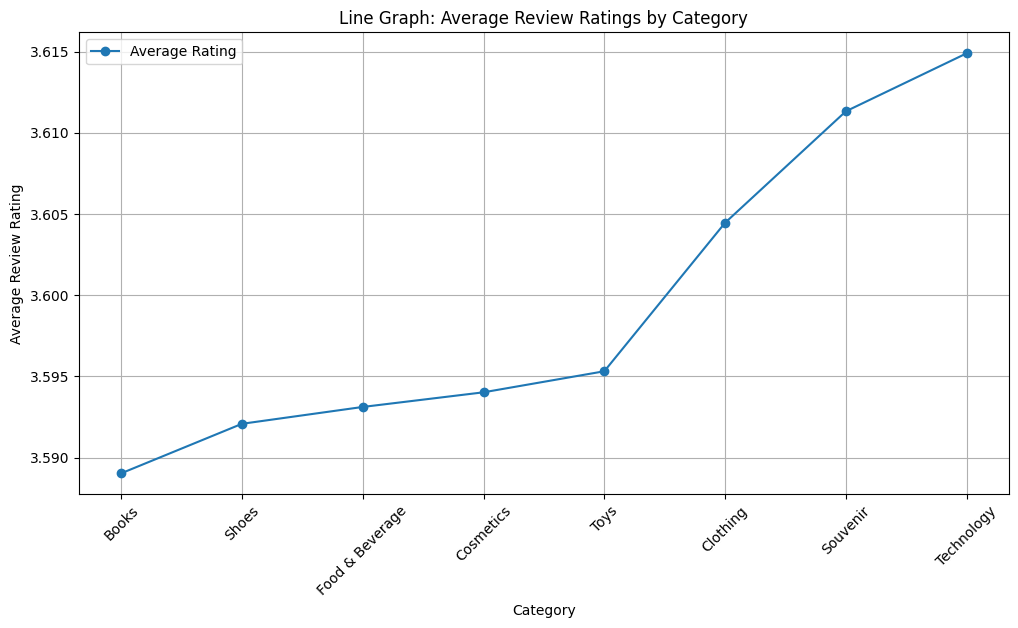

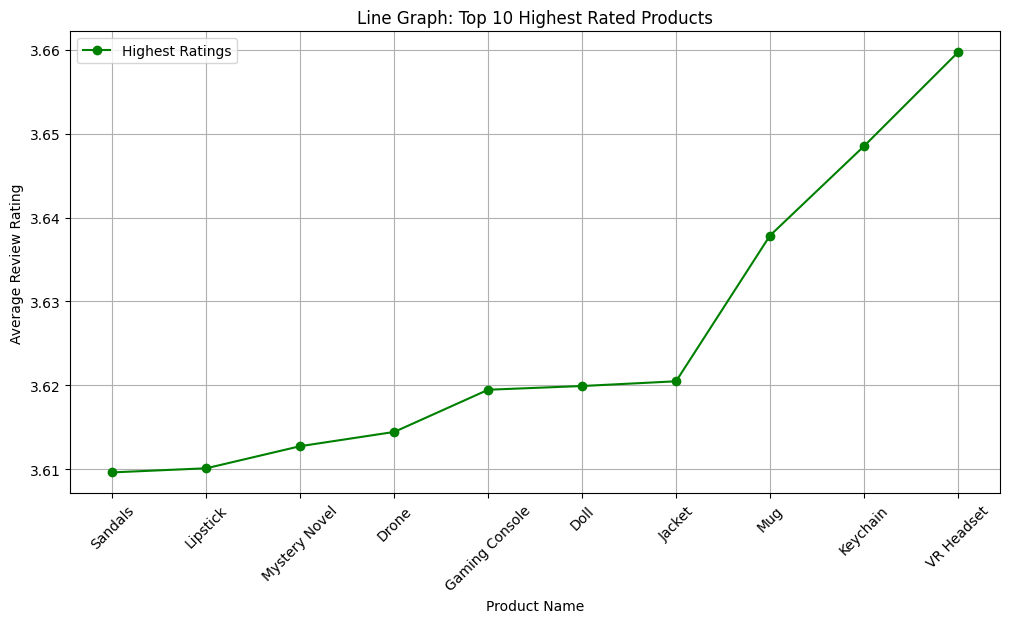

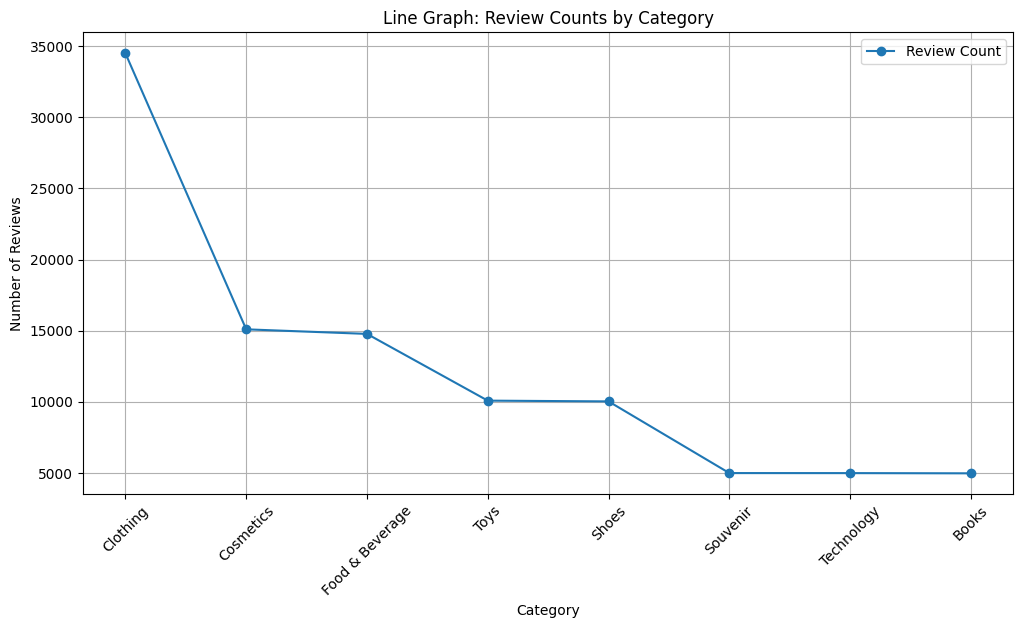

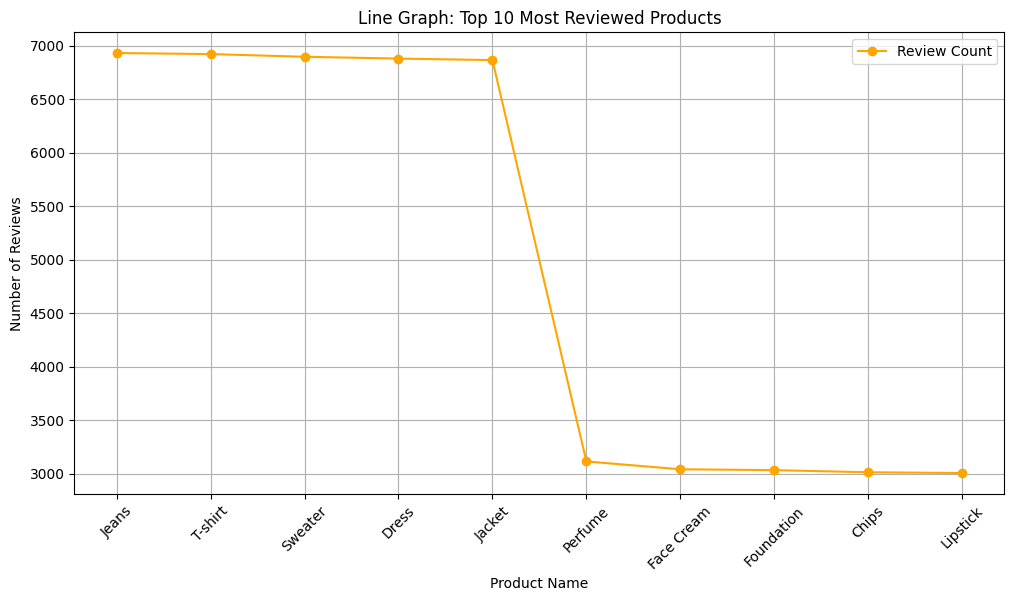

✅ Sentiment analysis completed. Data saved as 'processed_reviews.csv'.


In [61]:
from textblob import TextBlob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("retaildata.csv")

# Extract relevant columns and drop missing values
df = df[['review', 'category', 'product_name']].dropna()

# Function to analyze sentiment using TextBlob
def get_sentiment_score(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity  # Polarity score: -1 (negative) to 1 (positive)
    if polarity > 0.5:
        return np.random.uniform(4, 5)  # Positive sentiment
    elif polarity > -0.5:
        return np.random.uniform(2.5, 3.5)  # Neutral sentiment
    else:
        return np.random.uniform(0, 2)  # Negative sentiment

# Apply sentiment analysis to the reviews
df['sentiment_score'] = df['review'].apply(get_sentiment_score)

# Round sentiment scores for visualization
df['review_rating'] = df['sentiment_score'].round()

# Aggregate data for performance parameters
category_avg = df.groupby('category')['review_rating'].mean().sort_values()
product_avg = df.groupby('product_name')['review_rating'].mean().sort_values()
category_count = df.groupby('category')['review_rating'].count().sort_values(ascending=False)
product_count = df.groupby('product_name')['review_rating'].count().sort_values(ascending=False)

# Plot: Line graph for Review Ratings by Category
plt.figure(figsize=(12, 6))
plt.plot(category_avg.index, category_avg.values, marker='o', linestyle='-', label="Average Rating")
plt.xticks(rotation=45)
plt.xlabel("Category")
plt.ylabel("Average Review Rating")
plt.title("Line Graph: Average Review Ratings by Category")
plt.legend()
plt.grid()
plt.show()

# Plot: Line graph for Review Ratings by Product (Top 10 Highest Rated)
top_products = product_avg.tail(10)
plt.figure(figsize=(12, 6))
plt.plot(top_products.index, top_products.values, marker='o', linestyle='-', color='green', label="Highest Ratings")
plt.xticks(rotation=45)
plt.xlabel("Product Name")
plt.ylabel("Average Review Rating")
plt.title("Line Graph: Top 10 Highest Rated Products")
plt.legend()
plt.grid()
plt.show()

# Plot: Line graph for Review Counts by Category
plt.figure(figsize=(12, 6))
plt.plot(category_count.index, category_count.values, marker='o', linestyle='-', label="Review Count")
plt.xticks(rotation=45)
plt.xlabel("Category")
plt.ylabel("Number of Reviews")
plt.title("Line Graph: Review Counts by Category")
plt.legend()
plt.grid()
plt.show()

# Plot: Line graph for Review Counts by Product (Top 10 Most Reviewed)
top_reviewed_products = product_count.head(10)
plt.figure(figsize=(12, 6))
plt.plot(top_reviewed_products.index, top_reviewed_products.values, marker='o', linestyle='-', color='orange', label="Review Count")
plt.xticks(rotation=45)
plt.xlabel("Product Name")
plt.ylabel("Number of Reviews")
plt.title("Line Graph: Top 10 Most Reviewed Products")
plt.legend()
plt.grid()
plt.show()

# Save the processed data
df.to_csv("processed_reviews.csv", index=False)

print("✅ Sentiment analysis completed. Data saved as 'processed_reviews.csv'.")
